<a href="https://colab.research.google.com/github/Eseifan/Facebook_bids/blob/main/Copie_de_Facebook_bids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:



df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_bids = pd.read_csv('/content/drive/MyDrive/bids.csv')





In [4]:
df_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [5]:
for col in df_bids.columns:
    print(col)

bid_id
bidder_id
auction
merchandise
device
time
country
ip
url


## Question 1:
### For each auction, the number of unique ip addresses

In [6]:
unique_ips= df_bids.groupby ('auction') ['ip'].nunique()
new_column_names = [ 'No. unique IPs']

unique_ips.to_csv ('uniqueIps.csv',  header=new_column_names)
!cp uniqueIps.csv "/content/drive/MyDrive"

***

## Question 2:

### For each merchandise type, the country which sent the maximum number of bids (in the csv, include also the number of bids sent by that country)

In [7]:
merch = df_bids.groupby(['merchandise', 'country'], as_index= False).agg ({'bid_id': 'count'})

merch

,merchandise,country,bid_id
0,auto parts,ae,1
1,auto parts,au,1
2,auto parts,bd,503
3,auto parts,bn,21
4,auto parts,ca,89
...,...,...,...
1519,sporting goods,ye,82
1520,sporting goods,za,118915
1521,sporting goods,zm,12943
1522,sporting goods,zw,12654


In [8]:
merch=merch.loc[merch.reset_index().groupby(['merchandise'])['bid_id'].idxmax()]

merch

,merchandise,country,bid_id
14,auto parts,in,2243
101,books and music,in,11820
230,clothing,in,7619
411,computers,th,16731
495,furniture,in,47031
675,home goods,in,169649
861,jewelry,in,560773
1050,mobile,in,578076
1225,office equipment,in,56140
1411,sporting goods,in,346852


In [ ]:
new_column_names = [ 'Merch type', 'Country with max bids', 'no. of bids']
merch.to_csv ('bids_per_merch_type.csv',  header=new_column_names, index = False)
!cp bids_per_merch_type.csv "/content/drive/MyDrive"

# 

***

## Question 3:

### The data contains three separate time periods.  Calculate average number of unique bidders per auction in each of the three separate time periods

To visualise the time periods, we'll draw some scatter plots.

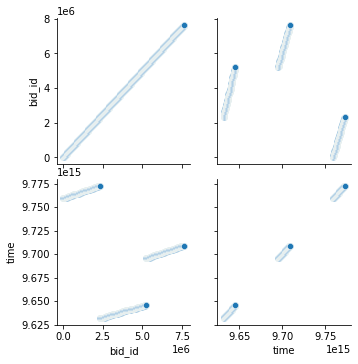

In [9]:
g = sns.PairGrid(df_bids)
g.map(sns.scatterplot)

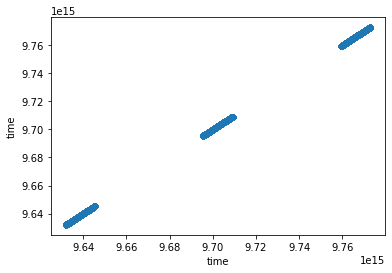

In [10]:
df_bids.plot (kind = 'scatter', x = 'time', y = 'time')

We can clarly see the three periods here.  I’ll group them under:
1. "period_1" from 0 to 9680000000000000
2. "period_2" from 9680000000000000 to 9740000000000000
3. "period_3 above 9740000000000000

I’ll then add these time perids as a column the DF and group by it.


In [11]:
def time_period (row):
    if 0< row['time']< 9680000000000000 :
      return 'period_1'
    if 9680000000000000< row['time']<  9740000000000000:
      return 'period_2'
    if 9740000000000000< row['time'] :
     return 'period_3'
    return 

In [12]:
df_bids ['time_period'] = df_bids.apply (lambda row: time_period (row), axis=1)


In [13]:
df_bids

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,time_period
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,period_3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,period_3
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,period_3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,period_3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,period_3
...,...,...,...,...,...,...,...,...,...,...
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug,period_2
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn,period_2
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa,period_2
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl,period_2


In [14]:

periods= df_bids.groupby (['time_period', 'auction'], as_index= False).agg ({'bidder_id':'nunique'}) 
periods

,time_period,auction,bidder_id
0,period_1,00hm5,6
1,period_1,00sj9,2
2,period_1,010lx,51
3,period_1,0143v,10
4,period_1,01dgm,9
...,...,...,...
19006,period_3,zzal8,12
19007,period_3,zzbm9,1
19008,period_3,zznnc,1
19009,period_3,zztha,2


In [15]:
periods= periods.groupby (('time_period'), as_index= False).agg ({'bidder_id':'mean'}) 

periods

,time_period,bidder_id
0,period_1,23.316925
1,period_2,22.509774
2,period_3,21.280234


In [ ]:
new_column_names = [ 'Period', 'average unique bidders per bid']
periods.to_csv ('periods.csv',  header=new_column_names, index = False)
!cp periods.csv "/content/drive/MyDrive"

# 

***

# Question 4:
### For each country, the fraction of times a bid from that country was identified as coming from a robot

Note: it is not exactly clear to me what you mean by "the fraction of times".  Do you mean the fraction of bids that came from robots?  Or the duration during which bids came from robots? Or the time difference between bids from robots?  I took the first hypothesis, it seemed the most likley to me. 

In [16]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_bids = pd.read_csv('/content/drive/MyDrive/bids.csv')

In [17]:
df_bids.head ()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [18]:
df_train.head ()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [19]:
# We have 6,614 unique bidders
len(df_bids ['bidder_id'].unique().tolist())



6614

In [20]:
#Check to see if all bidder_ids in df_train are unique: they are.
# This means no bidder was identified sometimes as robot, sometimes as human.
len(df_train ['bidder_id'].unique().tolist())


2013

Next I’ll join the bidder outcomes (robot or human to the main bidder data frame).
df_train is a subset of the total (it is a training set), so I’ll do an inner join,
This will truncate df_bidder by removing unclassified bidders (bidders that are not in df_train), but it is ok, since we are not interested in biders that have not been classified.



In [68]:

df_outcomes = pd.merge(df_bids, df_train, on='bidder_id', how='inner')
df_outcomes





,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
1,25,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
2,39,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
3,42,668d393e858e8126275433046bbd35c6tywop,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
4,68,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3071219,7617228,1dab9ffc5c6bf06e86e0dd1b3cb9ebecn5pu6,jqx39,jewelry,phone65,9709041947368421,cn,90.168.76.210,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228wissi,502100bcbbe650810a27b0e70d96372ere7rp,0.0
3071220,7637097,91c749114e26abdb9a4536169f9b4580huern,jqx39,jewelry,phone15,9709134105263157,id,221.143.27.57,pkegaymari9jblo,a3d2de7675556553a5f08e4c88d2c228tekzv,2cffbc8171f2ef4b5cafe94f038c877bcert5,1.0
3071221,7639758,a06311ea45de34bf667b79a92d13c764i6aiy,cy43h,sporting goods,phone142,9709146315789473,in,108.54.134.235,xe4uylmhtrsvss1,a3d2de7675556553a5f08e4c88d2c2284grjh,e1ef795abd4f178f753542cbbf54ce89jcfxk,0.0
3071222,7651414,dfb23124fba16b7778f65c1c8d091f949jz0k,y3n7r,mobile,phone21,9709200631578947,in,95.158.193.99,qctqqhoxoicvck1,4c94a221dc03977b5bf3f2035379797cn4n58,65d747de6c1cca49af4c0c27a5b7e8c7tti5y,0.0


In [69]:
#Count all the variables, inserting 0 where the count is 0
df_outcomes = df_outcomes.groupby(['country','outcome']).count().unstack(fill_value=0).stack()




Next we process this table.  First drop columns we don't need, keeping only 'outcome', 'country' and 'bid_id'.  Then we group by 'country', creating a group for each country, and apply the lambda function (x / x.sum())on each group to calculate fractions.  I then re-attach these fractions to the main data frame as 'percentages' column, with the percentage of bids coming from humans and robots for each country.


In [70]:
df_outcomes= df_outcomes.reset_index(level=0)
df_outcomes.drop(df_outcomes.columns.difference(['outcome','country','bid_id']), axis=1, inplace=True)
df_outcomes2 = df_outcomes.groupby('country')
df_outcomes ['percentage']=df_outcomes2['bid_id'].apply(lambda x: x / x.sum())
df_outcomes= df_outcomes.reset_index()
df_outcomes
df_outcomes.to_csv ('outcomes.csv', index = False)
!cp outcomes.csv "/content/drive/MyDrive"


In [60]:
# Keep only odd-numbered rows, et voilà:
l=[]
for i in df_outcomes.index.values:
    if(i%2==1):
        l.append(i)

df_outcomes =df_outcomes.iloc [l]
df_outcomes= df_outcomes.drop (['outcome','bid_id'], axis=1)

In [61]:
df_outcomes

,country,percentage
1,ad,0.285714
3,ae,0.085222
5,af,0.044769
7,ag,0.666667
9,al,0.022230
...,...,...
387,ye,0.109170
389,za,0.086032
391,zm,0.029700
393,zw,0.015813


In [62]:
new_column_names = [ 'country', 'fraction of bids from robots']
df_outcomes.to_csv ('robot_fraction.csv',  header=new_column_names, index = False)
!cp robot_fraction.csv "/content/drive/MyDrive"

In [ ]:
bid_intervals = df_outcomes.describe().reset_index()
bid_intervals

,index,percentage
0,count,198.000000
1,mean,0.224425
2,std,0.263703
3,min,0.000000
4,25%,0.035441
5,50%,0.124149
6,75%,0.281513
7,max,1.000000


# 

***

# Task 2: analysis and visualisation
## Using any programming language and libraries you want, perform exploratory data analysis on the data. You choose the variables you want to look at, the new features you want to construct, etc.

Mainly I’ll use pandas for this, but I may export results into Excel to make for the graphs — they look better.

In [100]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_bids = pd.read_csv('/content/drive/MyDrive/bids.csv')

I’ll join the outcome (human or robot to the main set again).

In [102]:
df_outcomes = pd.merge(df_bids, df_train, on='bidder_id', how='inner')

df_outcomes

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
1,25,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
2,39,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
3,42,668d393e858e8126275433046bbd35c6tywop,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
4,68,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3071219,7617228,1dab9ffc5c6bf06e86e0dd1b3cb9ebecn5pu6,jqx39,jewelry,phone65,9709041947368421,cn,90.168.76.210,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228wissi,502100bcbbe650810a27b0e70d96372ere7rp,0.0
3071220,7637097,91c749114e26abdb9a4536169f9b4580huern,jqx39,jewelry,phone15,9709134105263157,id,221.143.27.57,pkegaymari9jblo,a3d2de7675556553a5f08e4c88d2c228tekzv,2cffbc8171f2ef4b5cafe94f038c877bcert5,1.0
3071221,7639758,a06311ea45de34bf667b79a92d13c764i6aiy,cy43h,sporting goods,phone142,9709146315789473,in,108.54.134.235,xe4uylmhtrsvss1,a3d2de7675556553a5f08e4c88d2c2284grjh,e1ef795abd4f178f753542cbbf54ce89jcfxk,0.0
3071222,7651414,dfb23124fba16b7778f65c1c8d091f949jz0k,y3n7r,mobile,phone21,9709200631578947,in,95.158.193.99,qctqqhoxoicvck1,4c94a221dc03977b5bf3f2035379797cn4n58,65d747de6c1cca49af4c0c27a5b7e8c7tti5y,0.0


First we'll try to look at the average number of bids per bidder per auction and compare between humans and robots.

In [103]:
no_of_bids= df_outcomes.groupby (['auction', 'outcome', 'bidder_id'], as_index= False).agg ({'bid_id':'count'}) 

no_of_bids

,auction,outcome,bidder_id,bid_id
0,00270,0.0,2d38a6af2ce96c1446f900aa4756b8975y9k3,5
1,00270,0.0,384ba7c5a8ccf55d174080d9ad7de9b8mfysi,1
2,00270,0.0,5dda8ade6b5d4065f3119a381516c227yoz8y,2
3,00270,0.0,84c4b58a1491da3a30710bcdf61f87054xfq6,7
4,00270,0.0,9aca61f505f40a3b4f7865c2d00e2418s0e1f,1
...,...,...,...,...
124165,zzzy7,0.0,8251041848182e6468c8119905a177dekmshg,1
124166,zzzy7,0.0,bc3d08ad6ac94b8b5ce40a29b59899cakj3p5,2
124167,zzzy7,0.0,c5863a228287327c9980d12a632985da9vi29,7
124168,zzzy7,0.0,e9c8ee7f783723fe8496dd35232d88f2or1r1,3


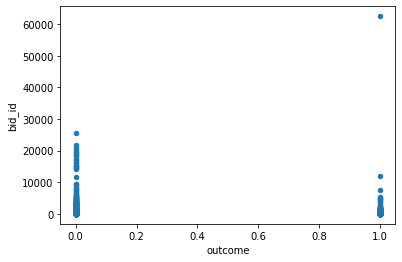

In [104]:
no_of_bids.plot (kind = 'scatter', x = 'outcome', y = 'bid_id')

We can see from the graph above that we have a super robot that put in more than 60,000 bids on one auction.  Let's identify the culprit, just for the fun of it.

In [105]:
no_of_bids.loc[no_of_bids['bid_id'] > 50000]

,auction,outcome,bidder_id,bid_id
68478,jqx39,1.0,9655ccc7c0c193f1549475f02c54dce45kjw7,62485


In [106]:
#Now take the average of the number of bids per auction grouped by outcome:

no_of_bids= no_of_bids.groupby (['outcome'], as_index= False).agg ({'bid_id':'mean'}) 

Final = no_of_bids
Final

,outcome,bid_id
0,0.0,24.341149
1,1.0,27.606667


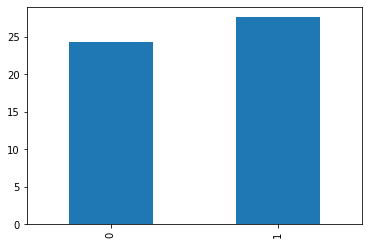

In [107]:
Final[ 'bid_id'].plot(kind="bar")

Now we'll lool at the number of bids per bidder

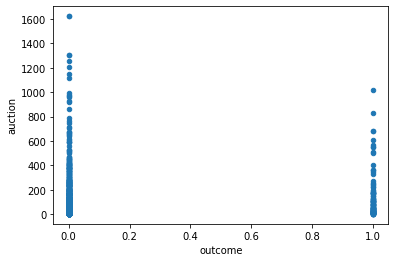

In [108]:
no_of_auctions= df_outcomes.groupby (['outcome', 'bidder_id'], as_index= False).agg ({'auction':'nunique'}) 

no_of_auctions.plot (kind = 'scatter', x = 'outcome', y = 'auction')

In [109]:
no_of_auctions= no_of_auctions.groupby (['outcome'], as_index= False).agg ({'auction':'mean'}) 

Final ['av_auctions']= no_of_auctions ['auction']
Final

,outcome,bid_id,av_auctions
0,0.0,24.341149,58.070707
1,1.0,27.606667,145.038835


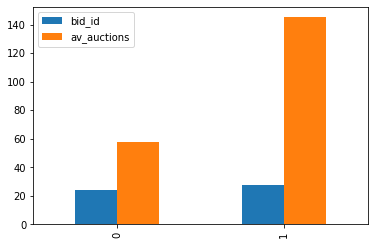

In [110]:
Final[ ['bid_id', 'av_auctions']].plot(kind="bar")

By type of merchandise:

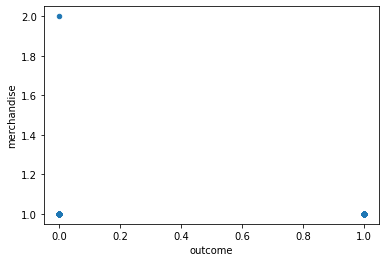

In [111]:
merch= df_outcomes.groupby (['outcome', 'bidder_id'], as_index= False).agg ({'merchandise':'nunique'}) 

merch.plot (kind = 'scatter', x = 'outcome', y = 'merchandise')

In [112]:
merch= merch.groupby (['outcome'], as_index= False).agg ({'merchandise':'mean'}) 

Final ['merchandise_type']= merch ['merchandise']
Final

,outcome,bid_id,av_auctions,merchandise_type
0,0.0,24.341149,58.070707,1.000532
1,1.0,27.606667,145.038835,1.000000


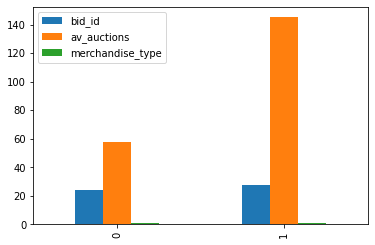

In [113]:
Final[ ['bid_id', 'av_auctions', 'merchandise_type']].plot(kind="bar")

Now we'll look at the time difference between two successive bids

In [114]:
#Find the interval between two successive bids by the same bidder.  First bids and bidders who
#made only one bid will get 'NaN' as value.
time_diff1 = df_outcomes.sort_values (['bidder_id', 'time'])
time_diff2 = time_diff1.groupby('bidder_id')[['time']].diff()
time_diff2

,time
3071003,NaN
3070971,NaN
3032540,NaN
3032541,8.853158e+11
3032542,1.020526e+11
...,...
3037888,3.072632e+12
3037889,1.653895e+12
3037890,2.886000e+12
3037891,6.044211e+11


In [115]:
time_diff1['time_diff'] = time_diff2
time_diff1

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,time_diff
3071003,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35,0.0,NaN
3070971,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv,a3d2de7675556553a5f08e4c88d2c228jem8t,f3bc67b04b43c3cebd1db5ed4941874c9br67,0.0,NaN
3032540,2501797,00a0517965f18610417ee784a05f494d4dw6e,l3o6q,books and music,phone451,9632299631578947,bh,103.165.41.136,kk7rxe25ehseyci,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0.0,NaN
3032541,2724778,00a0517965f18610417ee784a05f494d4dw6e,du967,books and music,phone117,9633184947368421,tr,239.250.228.152,iu2iu3k137vakme,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0.0,8.853158e+11
3032542,2742648,00a0517965f18610417ee784a05f494d4dw6e,wx3kf,books and music,phone16,9633287000000000,in,255.108.248.101,u85yj2e7owkz6xp,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0.0,1.020526e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037888,6553635,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,x28vd,mobile,phone68,9703232368421052,in,68.216.60.120,on2abswwj7d1ag7,15599f95d9b93471115524963ca2be217u8m4,ae8ea67c5321d60e9b34cc779488d081rbqkb,0.0,3.072632e+12
3037889,6899966,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,cpztg,mobile,phone57,9704886263157894,in,60.90.232.85,v4k3ro0ulspuq3n,15599f95d9b93471115524963ca2be217u8m4,ae8ea67c5321d60e9b34cc779488d081rbqkb,0.0,1.653895e+12
3037890,7377121,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,enf1x,mobile,phone76,9707772263157894,ng,79.120.254.209,9s29kzk5tpo0sax,15599f95d9b93471115524963ca2be217u8m4,ae8ea67c5321d60e9b34cc779488d081rbqkb,0.0,2.886000e+12
3037891,7483918,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,9ul86,mobile,phone25,9708376684210526,ng,113.76.102.6,cnco8tom1nxvtlb,15599f95d9b93471115524963ca2be217u8m4,ae8ea67c5321d60e9b34cc779488d081rbqkb,0.0,6.044211e+11


In [116]:
#Drop the "NaN", to keep only successive bids:
time_diff =  time_diff1[time_diff1.time_diff.notnull()]

time_diff


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,time_diff
3032541,2724778,00a0517965f18610417ee784a05f494d4dw6e,du967,books and music,phone117,9633184947368421,tr,239.250.228.152,iu2iu3k137vakme,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0.0,8.853158e+11
3032542,2742648,00a0517965f18610417ee784a05f494d4dw6e,wx3kf,books and music,phone16,9633287000000000,in,255.108.248.101,u85yj2e7owkz6xp,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0.0,1.020526e+11
3032543,2852666,00a0517965f18610417ee784a05f494d4dw6e,gb2b8,books and music,phone1008,9634158210526315,id,255.107.151.243,kk7rxe25ehseyci,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0.0,8.712105e+11
3032544,2915632,00a0517965f18610417ee784a05f494d4dw6e,cci6c,books and music,phone154,9634606052631578,ng,37.95.134.218,vasstdc27m7nks3,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0.0,4.478421e+11
3032545,3980517,00a0517965f18610417ee784a05f494d4dw6e,bpil5,books and music,phone419,9640088105263157,in,58.209.11.187,jynce1r4nc22vrd,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0.0,5.482053e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037887,6032533,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,l8qqr,mobile,phone317,9700159736842105,bd,57.101.190.69,vasstdc27m7nks3,15599f95d9b93471115524963ca2be217u8m4,ae8ea67c5321d60e9b34cc779488d081rbqkb,0.0,6.889474e+10
3037888,6553635,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,x28vd,mobile,phone68,9703232368421052,in,68.216.60.120,on2abswwj7d1ag7,15599f95d9b93471115524963ca2be217u8m4,ae8ea67c5321d60e9b34cc779488d081rbqkb,0.0,3.072632e+12
3037889,6899966,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,cpztg,mobile,phone57,9704886263157894,in,60.90.232.85,v4k3ro0ulspuq3n,15599f95d9b93471115524963ca2be217u8m4,ae8ea67c5321d60e9b34cc779488d081rbqkb,0.0,1.653895e+12
3037890,7377121,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,enf1x,mobile,phone76,9707772263157894,ng,79.120.254.209,9s29kzk5tpo0sax,15599f95d9b93471115524963ca2be217u8m4,ae8ea67c5321d60e9b34cc779488d081rbqkb,0.0,2.886000e+12


In [117]:
#average interval for each bidder:
time_diff= time_diff.groupby (['outcome', 'bidder_id'], as_index= False).agg ({'time_diff':'mean'}) 

time_diff

,outcome,bidder_id,time_diff
0,0.0,00a0517965f18610417ee784a05f494d4dw6e,5.486831e+11
1,0.0,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,2.748400e+13
2,0.0,01067975436d123f717ee5aba0dd4bbfa0937,2.507283e+10
3,0.0,012441119bcf83b23d4768bb72cea6d6carua,5.622344e+11
4,0.0,01255c2c7c5578c186873422fc00fd7afwk8k,2.074860e+11
...,...,...,...
1677,1.0,e268d06507859d78894a8f6e11995f48zls7t,1.906603e+10
1678,1.0,e56f611f1157381f4b689ab34b574e791qhcn,2.114297e+10
1679,1.0,efc61ad6db17265a4bac85f77b154ef414tpp,1.516000e+12
1680,1.0,f2f10539ed947e4b141b2e9bf21af65ecz4f7,1.006970e+10


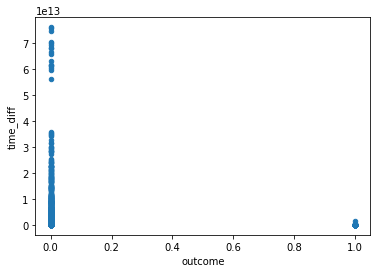

In [118]:
time_diff.plot (kind = 'scatter', x = 'outcome', y = 'time_diff')

In [119]:
#Average interval per bidder by type:
time_diff= time_diff.groupby (['outcome', ], as_index= False).agg ({'time_diff':'mean'}) 

time_diff

,outcome,time_diff
0,0.0,3.395101e+12
1,1.0,5.332332e+10


In [120]:
Final ['time_diff']= time_diff ['time_diff']
Final

,outcome,bid_id,av_auctions,merchandise_type,time_diff
0,0.0,24.341149,58.070707,1.000532,3.395101e+12
1,1.0,27.606667,145.038835,1.000000,5.332332e+10


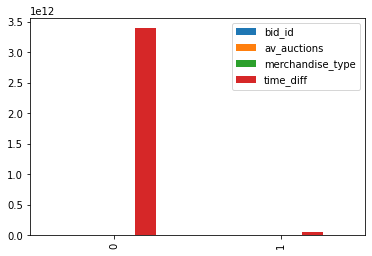

In [121]:
Final[ ['bid_id', 'av_auctions', 'merchandise_type','time_diff']].plot(kind="bar")

No. of countries from which bids come, by type:

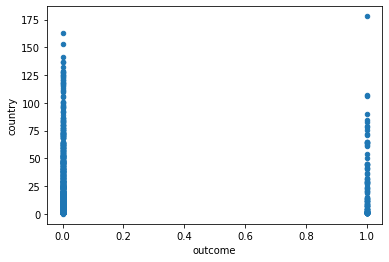

In [122]:
countries= df_outcomes.groupby (['outcome', 'bidder_id'], as_index= False).agg ({'country':'nunique'}) 
countries.plot (kind = 'scatter', x = 'outcome', y = 'country')

In [123]:
countries= countries.groupby (['outcome'], as_index= False).agg ({'country':'mean'}) 

countries

,outcome,country
0,0.0,12.587453
1,1.0,26.320388


In [124]:
Final ['countries']= countries ['country']
Final

,outcome,bid_id,av_auctions,merchandise_type,time_diff,countries
0,0.0,24.341149,58.070707,1.000532,3.395101e+12,12.587453
1,1.0,27.606667,145.038835,1.000000,5.332332e+10,26.320388


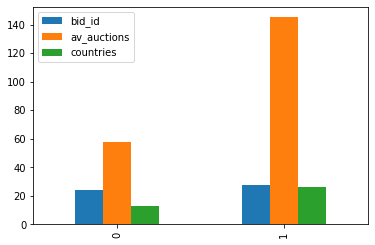

In [125]:
Final[ ['bid_id', 'av_auctions', 'countries']].plot(kind="bar")

Per no. of IP addresses used:

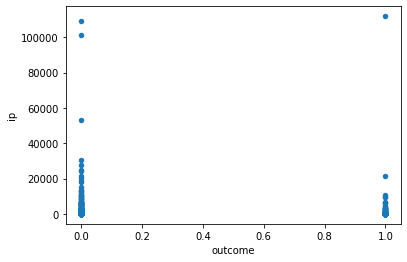

In [126]:
ip= df_outcomes.groupby (['outcome', 'bidder_id'], as_index= False).agg ({'ip':'nunique'}) 

ip.plot (kind = 'scatter', x = 'outcome', y = 'ip')

In [128]:
ip= ip.groupby (['outcome'], as_index= False).agg ({'ip':'mean'}) 


Final ['no_ip']= ip ['ip']
Final

,outcome,bid_id,av_auctions,merchandise_type,time_diff,countries,no_ip
0,0.0,24.341149,58.070707,1.000532,3.395101e+12,12.587453,581.256247
1,1.0,27.606667,145.038835,1.000000,5.332332e+10,26.320388,2387.796117


In [129]:
new_column_names = [ 'Type', 'Av. no. bids per auction', 'av. no. auctions', 'Av. merch type','av. time difference between bids', 'av. no. of countries', 'av. no. of IPs']
Final.to_csv ('Final.csv',  header=new_column_names, index = False)

In [130]:
!cp Final.csv "/content/drive/MyDrive"